# Machine Learning | Credit card fraud detection

## Problem Statement

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

## Importing all the necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

## Loading the Data

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Statistics

In [4]:
data.shape

(284807, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Exploratory Data Analysis

In [34]:
# Checking for any null value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no Null(Missing) Values

In [7]:
Fraud = round(data['Class'].value_counts()[1]/len(data)*100,3)
NonFraud = round(data['Class'].value_counts()[0]/len(data)*100,3)


print("Number of Fraud Values :\t \t  ",data['Class'].value_counts()[1])
print("Number of Non Fraud Values :\t        ",data['Class'].value_counts()[0])
print("\n")
print("Percentage of Fraud transactions :  \t ", Fraud)
print("Percentage of Normal(Non-Fraud) transactions :  ",NonFraud)

Number of Fraud Values :	 	   492
Number of Non Fraud Values :	         284315


Percentage of Fraud transactions :  	  0.173
Percentage of Normal(Non-Fraud) transactions :   99.827


Pie Chart:



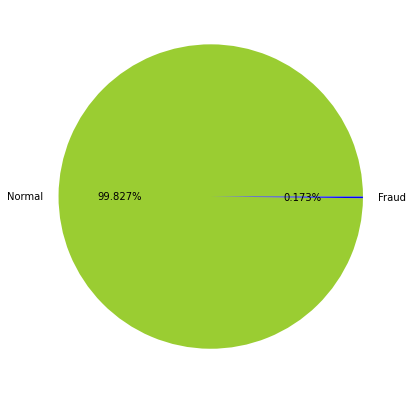

In [10]:
# Data Visualization
print("Pie Chart:\n")
fig = plt.figure(figsize =(10, 7))
plt.pie(data.Class.value_counts(), autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','blue']) 
plt.show()

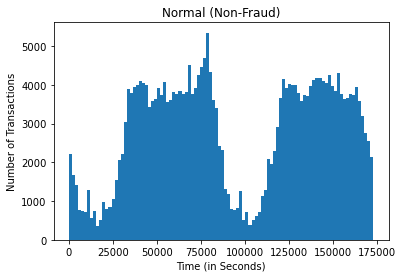

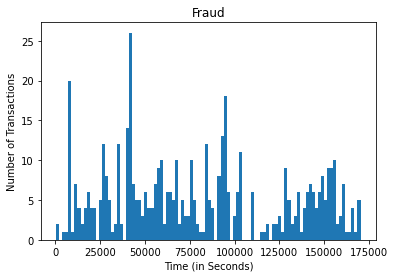

In [14]:
#checking Time value in case of Fraud and Normal Transaction compared according to Number of transactions.

plt.hist(data.Time[data.Class == 0], bins = 100)
plt.title('Normal (Non-Fraud)')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

plt.hist(data.Time[data.Class == 1], bins = 100)
plt.title('Fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

We can see that in both cases , feature time looks similar. but if we look carefully, we can see that Normal 
transactions are kind of uniformly distributed whereas the shape of Fraud transaction is not

## Plotting the Correlation Matrix

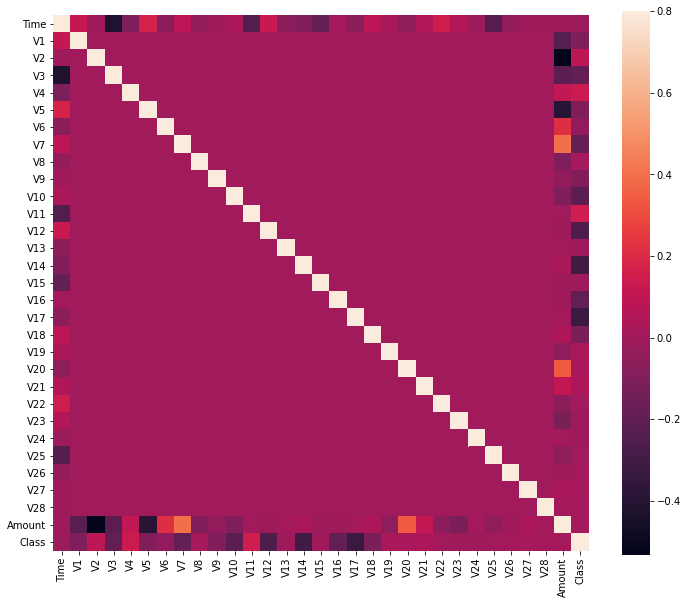

In [15]:
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 10)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In the Correlation matrix, there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount.

## Random Forest Classifier

In [17]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
Fraction = len(fraud)/float(len(valid)) 
print("Fraction of Fraud transaction to the Valid transaction: ", str(Fraction)) 

Fraction of Fraud transaction to the Valid transaction:  0.0017304750013189597


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

In [18]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape)  
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


### Training and Testing Data

In [20]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(xData, yData, test_size = 0.3, random_state = 42) 

### Building a Random Forest Model using scikit-learn

In [25]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(X_Train, Y_Train) 
YPred = rfc.predict(X_Test) 

## Training and Testing Accuracy

In [33]:
print("Trainig accuracy",rfc.score(X_Train,Y_Train))  
print()
print("Testing accuracy",rfc.score(X_Test, Y_Test))
print()

Trainig accuracy 1.0

Testing accuracy 0.9996254813150287



### Evaluating the Classifier

In [26]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) 
n_errors = (YPred != Y_Test).sum() 
print("The model used is Random Forest classifier") 

acc = accuracy_score(Y_Test, YPred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(Y_Test, YPred) 
print("The precision is {}".format(prec)) 

rec = recall_score(Y_Test, YPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(Y_Test, YPred) 
print("The F1-Score is {}".format(f1))  

The model used is Random Forest classifier
The accuracy is 0.9996254813150287
The precision is 0.940677966101695
The recall is 0.8161764705882353
The F1-Score is 0.8740157480314961


## Visualizing Confusion Matrix

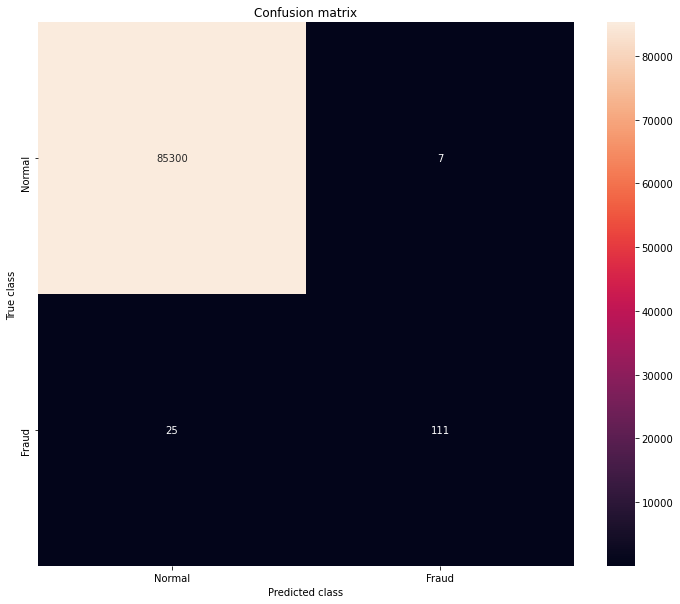

In [29]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_Test,YPred) 
plt.figure(figsize =(12, 10)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 